## Disclaimer: This set of homework applies SMOTE to a seriously imbalanced dataset with a large number of features and data points. SMOTE is essentially a time consuming method. You need to start doing this homework early, so that you have enough time to run SMOTE on the full dataset.

## 1. The LASSO and Boosting for Regression

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##### (a) Download the Communities and Crime data1 from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the rst 1495 rows of data as the training set and the rest as the test set.
##### (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [2]:
comm_data = pd.read_csv("communities.data",header=None,na_values=['?'])
comm_data = comm_data.fillna(comm_data.median())
comm_data = comm_data.loc[:,5:]
commu_crime_train_x, commu_crime_test_x, commu_crime_train_y, commu_crime_test_y = train_test_split(comm_data.iloc[:,:-1], comm_data.iloc[:,-1], train_size=1495, shuffle=False)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
print(comm_data)
print(commu_crime_train_x)
print(commu_crime_test_x)
print(commu_crime_train_y)
print(commu_crime_test_y)

       5     6     7     8     9     10    11    12    13    14   ...   118  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...  0.12   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...  0.02   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...  0.01   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...  0.02   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...  0.04   
5     0.02  0.28  0.06  0.54  1.00  0.25  0.31  0.48  0.27  0.37  ...  0.01   
6     0.01  0.39  0.00  0.98  0.06  0.02  0.30  0.37  0.23  0.60  ...  0.05   
7     0.01  0.74  0.03  0.46  0.20  1.00  0.52  0.55  0.36  0.35  ...  0.01   
8     0.03  0.34  0.20  0.84  0.02  0.00  0.38  0.45  0.28  0.48  ...  0.04   
9     0.01  0.40  0.06  0.87  0.30  0.03  0.90  0.82  0.80  0.39  ...  0.00   
10    0.13  0.71  0.15  0.07  1.00  0.41  0.40  0.52  0.35  0.33  ...  0.02   
11    0.02  0.46  0.08  0.91  0.07  0.10  0.34  0.36

##### (c) Plot a correlation matrix for the features in the data set.

In [4]:
import seaborn as sns

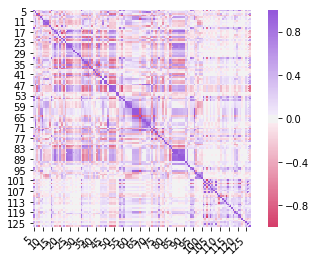

In [5]:
commu_crime_corr = comm_data.corr()
ax = sns.heatmap(
    commu_crime_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 1000, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

##### (d) Calculate the Coecient of Variation CV for each feature, where CV = s/m, in which s is sample standard deviation and m is sample mean.

In [6]:
comm_data

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.08,0.03,0.75,0.5,0.00,0.15,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.08,0.03,0.75,0.5,0.00,0.15,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.01,0.58,0.10,0.08,0.03,0.75,0.5,0.00,0.15,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.05,0.08,0.06,0.08,0.03,0.75,0.5,0.00,0.15,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.01,0.33,0.00,0.08,0.03,0.75,0.5,0.00,0.15,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.04,0.17,0.04,0.08,0.03,0.75,0.5,0.00,0.15,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.00,0.47,0.11,0.08,0.03,0.75,0.5,0.00,0.15,0.15


In [7]:
feature_CV = []
for i in range(len(comm_data.loc[0])):
    feature_CV.append(comm_data.iloc[:,i].std()/comm_data.iloc[:,i].mean())
df_CV = pd.DataFrame({"Coefficient of Variation":feature_CV})

In [8]:
(comm_data.iloc[:,0].std())/(comm_data.iloc[:,0].mean())

2.203502536390972

In [9]:
df_CV

,Coefficient of Variation
0,2.203503
1,0.353298
2,1.410920
3,0.323782
4,1.359162
5,1.614278
6,0.365840
7,0.290693
8,0.495161
9,0.423442


##### (e) Pick 128**(1/2) (down Gausian) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [10]:
import heapq
arr_of_CV = df_CV.to_numpy()
top_11_CV = heapq.nlargest(11, range(len(arr_of_CV)), arr_of_CV.take)

In [11]:
arr_of_CV

array([[2.20350254],
       [0.3532983 ],
       [1.4109204 ],
       [0.32378156],
       [1.35916219],
       [1.61427779],
       [0.36583987],
       [0.29069289],
       [0.49516051],
       [0.42344171],
       [2.00174364],
       [0.63884887],
       [0.57975339],
       [0.32771006],
       [0.70003012],
       [0.35923995],
       [0.36851263],
       [0.6990305 ],
       [0.34963908],
       [0.52773189],
       [0.54563343],
       [0.50755219],
       [0.589469  ],
       [0.80968509],
       [0.60619385],
       [0.67069118],
       [0.47395972],
       [2.30496971],
       [0.75398017],
       [0.67560022],
       [0.52828627],
       [0.57840084],
       [0.5561328 ],
       [0.34732725],
       [0.51058034],
       [0.39822568],
       [0.50846131],
       [0.42210586],
       [0.39558337],
       [0.40381162],
       [0.3592727 ],
       [0.37146815],
       [0.31695475],
       [0.33061114],
       [0.33247588],
       [0.32942584],
       [0.32855095],
       [0.336

In [12]:
top_11_CV_columns = []
for i in top_11_CV:
    i = i + 5
    top_11_CV_columns.append(i)

In [13]:
top_11_CV

[108, 90, 89, 49, 51, 120, 27, 0, 96, 10, 71]

In [14]:
top_11_CV_columns

[113, 95, 94, 54, 56, 125, 32, 5, 101, 15, 76]

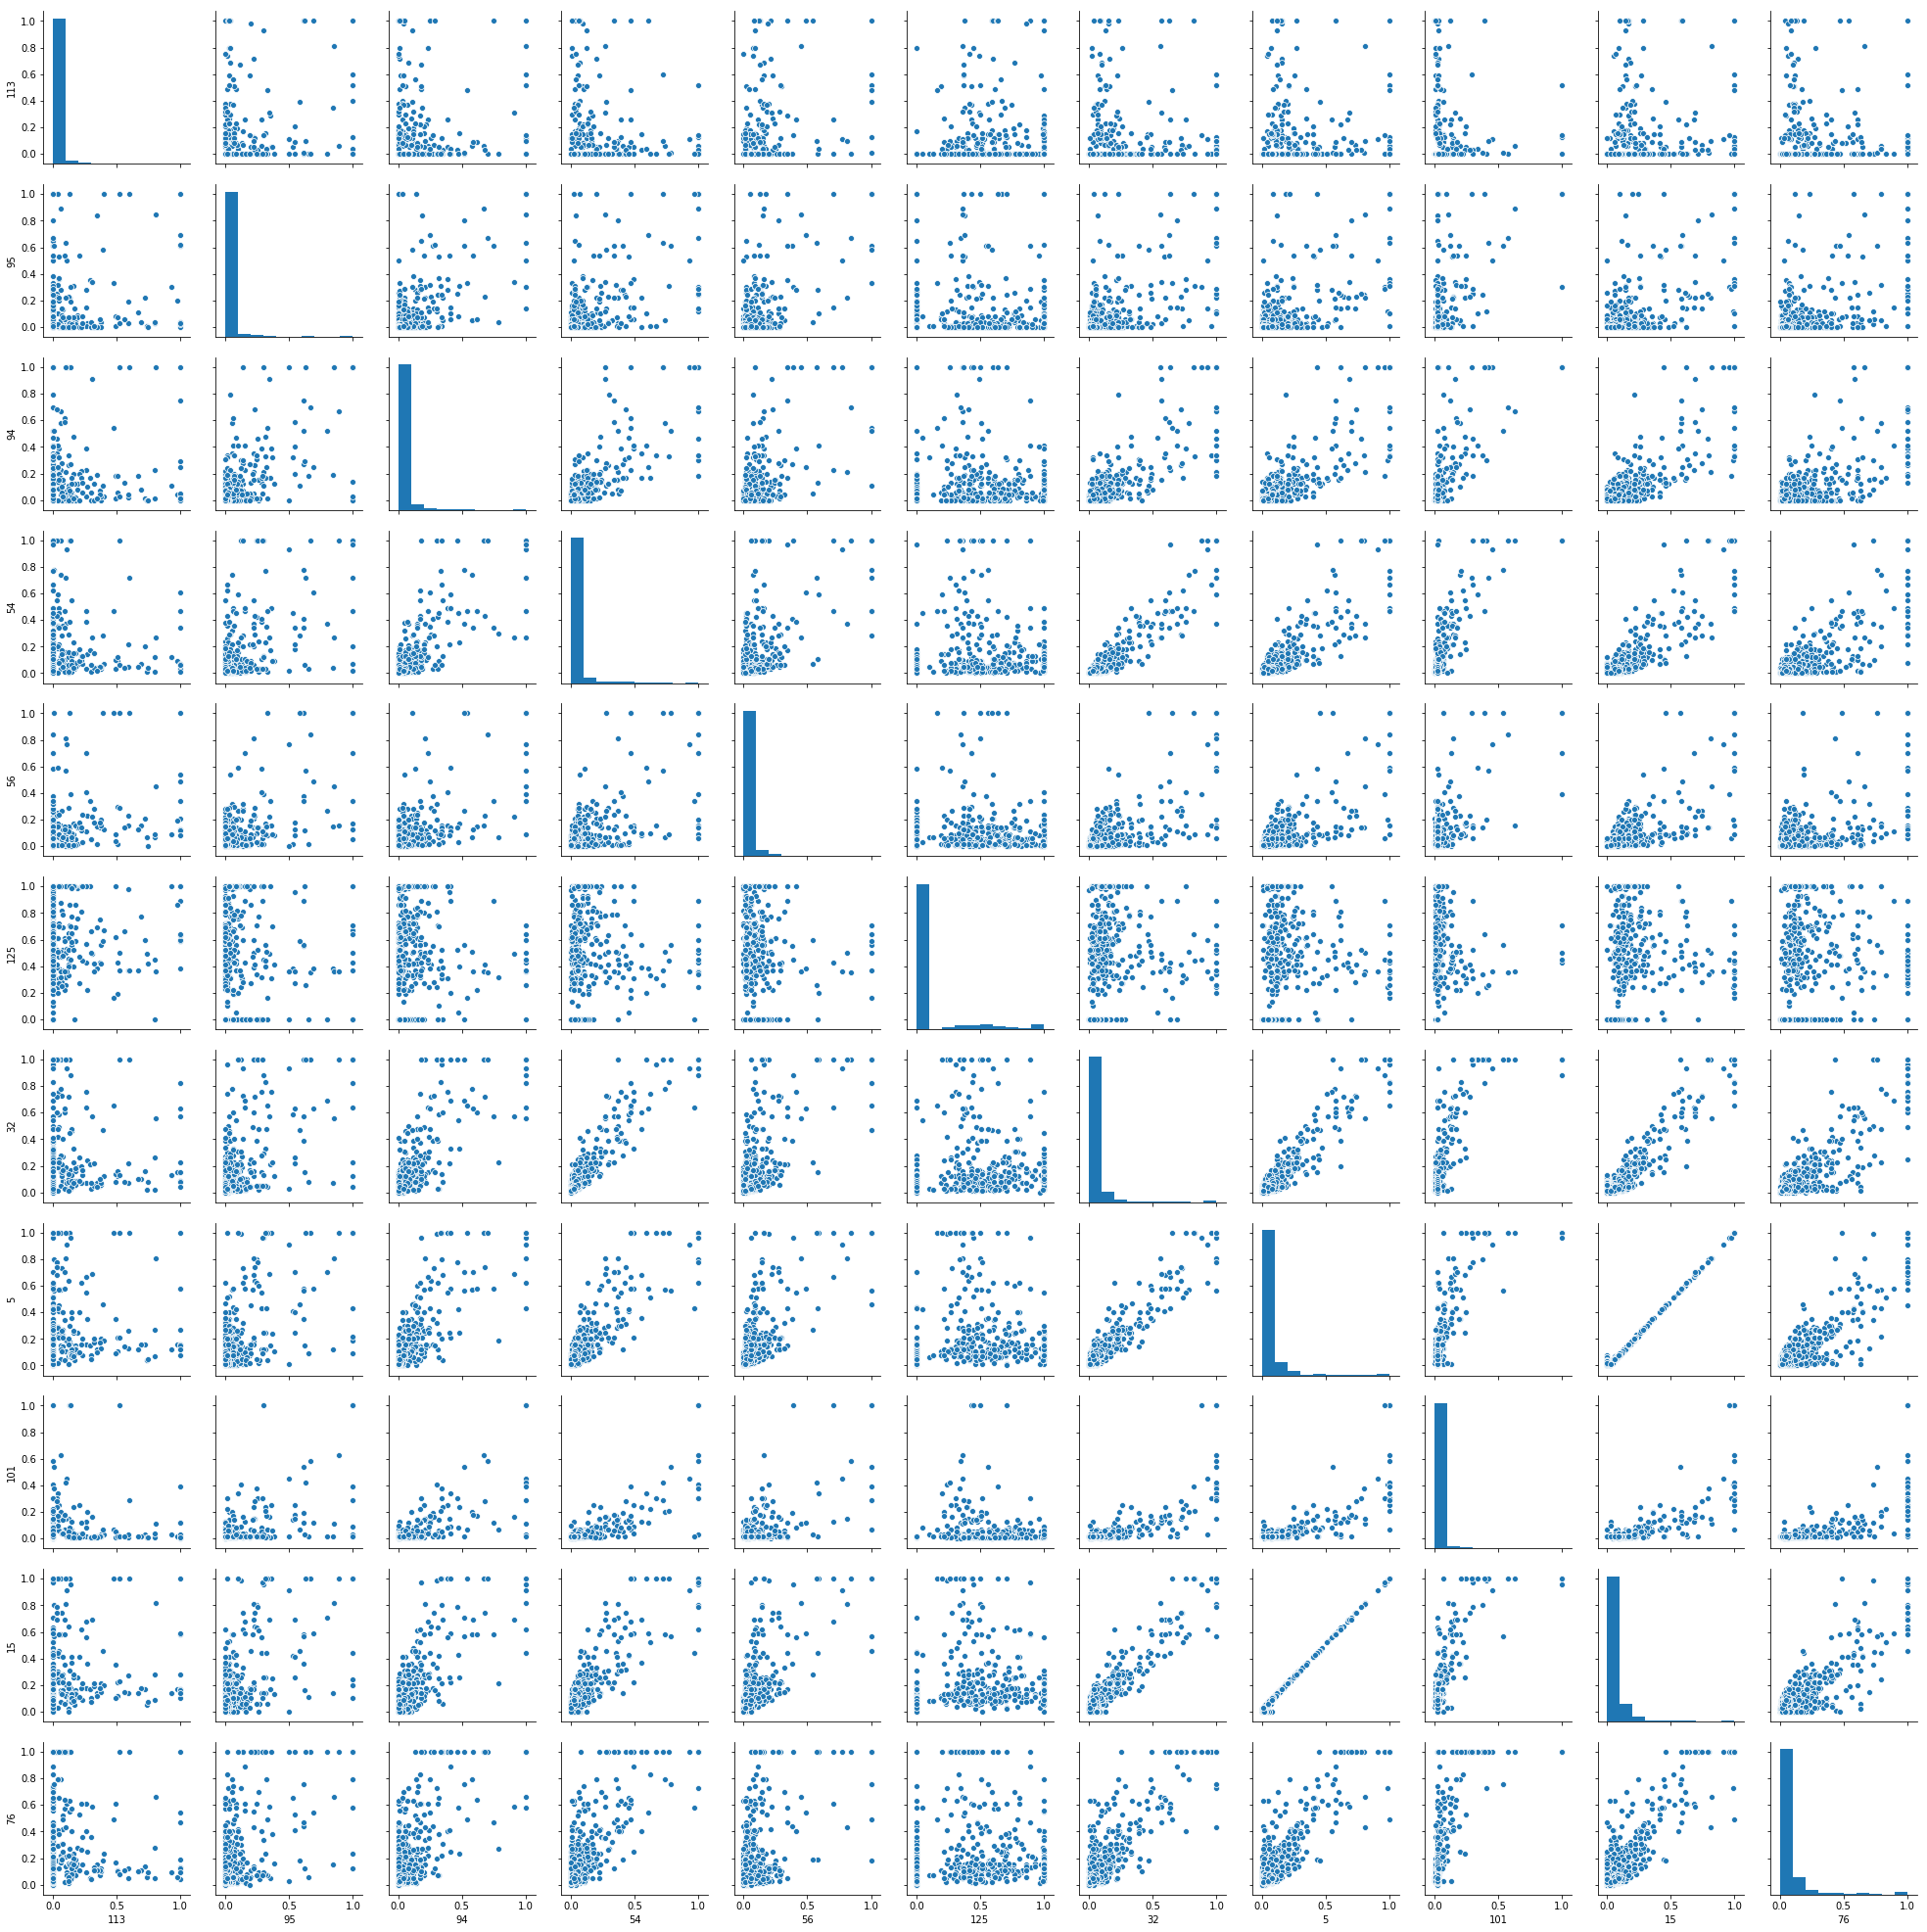

In [15]:
sns.pairplot(comm_data.iloc[:, top_11_CV])
plt.show()

In [16]:
top11_CV_df = comm_data.iloc[:, top_11_CV]
top11_CV_df.columns = top11_CV_df.columns.map(str)
top11_CV_df["Target"] = commu_crime_train_y
# for i in top11_CV_df:
#     if i != 'Target':
#         g = sns.lmplot(x = i, y = 'Target', data = top11_CV_df, sharey = False)
# sns.pairplot(df_13_fea)
# plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Features')

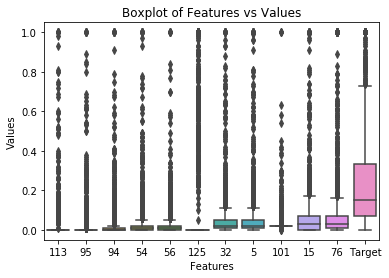

In [17]:
boxplot_top11_CV = sns.boxplot(data = top11_CV_df)
boxplot_top11_CV.set_title('Boxplot of Features vs Values')
boxplot_top11_CV.set_ylabel('Values')
boxplot_top11_CV.set_xlabel('Features')

We can find positive correlation between those features, however, there are still too much numbers on the edges. This would decrease some correlation of them

##### (f) Fit a linear model using least squares to the training set and report the test error.

In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
Linear_reg = linear_model.LinearRegression()
Linear_reg.fit(commu_crime_train_x, commu_crime_train_y)
y_pred_test = Linear_reg.predict(commu_crime_test_x)

print('Mean squared test error of Linear Regression Model: ', mean_squared_error(commu_crime_test_y, y_pred_test))
print('r2_score : ', r2_score(commu_crime_test_y, y_pred_test))

Mean squared test error of Linear Regression Model:  0.017976972571643615
r2_score :  0.6219775219172968


##### (g) Fit a ridge regression model on the training set, with LanDa chosen by cross-validation. Report the test error obtained.

In [19]:
from sklearn.linear_model import RidgeCV

Ridge_CV = RidgeCV(store_cv_values=True)
Ridge_CV.fit(commu_crime_train_x, commu_crime_train_y) 
y_pred_Ridge = Ridge_CV.predict(commu_crime_test_x)
print('Mean squared test error of Ridge Regression Model by CV: ', mean_squared_error(commu_crime_test_y, y_pred_Ridge))

Mean squared test error of Ridge Regression Model by CV:  0.01763096307170374


##### (h) Fit a LASSO model on the training set, with  chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized2 features. Report the test error for both cases and compare them.

In [20]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import lasso_path
from sklearn import linear_model

Lasso_CV = linear_model.LassoCV()
Lasso_CV.fit(commu_crime_train_x, commu_crime_train_y) 
y_pred_Lasso = Lasso_CV.predict(commu_crime_test_x)
print('Mean squared test error of Lasso Model: ', mean_squared_error(commu_crime_test_y, y_pred_Lasso))

Mean squared test error of Lasso Model:  0.017563239468825036


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [21]:
list_of_the_variables_selected = []
for i in range(len(Lasso_CV.coef_)):
    if Lasso_CV.coef_[i] != 0:
        list_of_the_variables_selected.append(i + 5)
print('The total number is ', len(list_of_the_variables_selected), " and list of the variables selected are",list_of_the_variables_selected)

The total number is  45  and list of the variables selected are [7, 12, 16, 18, 19, 20, 22, 23, 27, 28, 29, 30, 31, 33, 38, 43, 49, 50, 51, 53, 55, 64, 72, 73, 74, 76, 77, 79, 80, 81, 83, 87, 90, 91, 93, 95, 96, 99, 106, 107, 119, 120, 124, 125, 126]


In [22]:
Lasso_CV_nor = linear_model.LassoCV(normalize=True)
Lasso_CV_nor.fit(commu_crime_train_x, commu_crime_train_y) 
y_pred_Lasso_nor = Lasso_CV_nor.predict(commu_crime_test_x)
print('Mean squared test error of Lasso Model with normalize: ', mean_squared_error(commu_crime_test_y, y_pred_Lasso_nor))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

Mean squared test error of Lasso Model with normalize:  0.017425563719445942


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [23]:
list_of_the_variables_selected_nor = []
for i in range(len(Lasso_CV_nor.coef_)):
    if Lasso_CV_nor.coef_[i] != 0:
        list_of_the_variables_selected_nor.append(i + 5)
print('The total number is ', len(list_of_the_variables_selected_nor), " and list of the variables selected are",list_of_the_variables_selected_nor)

The total number is  32  and list of the variables selected are [7, 8, 12, 16, 20, 22, 23, 28, 29, 30, 43, 49, 50, 53, 55, 73, 74, 76, 77, 79, 80, 91, 93, 95, 96, 99, 104, 107, 109, 113, 124, 126]


The number of variables selected reduced a lot after normalize, but the Mean squared test error is almost same.

##### (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [24]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import cross_validation

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
pca = PCA()
X_reduced_train = pca.fit_transform(scale(commu_crime_train_x))
n = len(X_reduced_train)
kf_5 = cross_validation.KFold(n, n_folds=5, shuffle=True, random_state=1)
pca_mse = []
reg_1 = linear_model.LinearRegression()

score = -1*cross_validation.cross_val_score(reg_1, commu_crime_train_x, commu_crime_train_y.ravel(), cv = 5).mean()
pca_mse.append(score)

for i in range(1, 123):
    score = -1*cross_validation.cross_val_score(reg_1, X_reduced_train[:,:i], commu_crime_train_y.ravel(), cv = 5).mean()
    pca_mse.append(score)

X_reduced_test = pca.transform(scale(commu_crime_test_x))[:,:np.argmin(pca_mse) + 1]
reg_2 = linear_model.LinearRegression()
reg_2.fit(X_reduced_train[:,:np.argmin(pca_mse) + 1], commu_crime_train_y)
pred_pca_y = reg_2.predict(X_reduced_test)

print('Principal components numbers : ',np.argmin(pca_mse) + 1)
print("Mean squared test error of PCR: ", mean_squared_error(commu_crime_test_y, pred_pca_y))

Principal components numbers :  96
Mean squared test error of PCR:  0.01863165521150873


###### (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine alfa (the regularization term) using cross-validation.

In [26]:
import xgboost as xgb
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
GridSearch_CV = GridSearchCV(cv=5,
       estimator=xgb.XGBRegressor(objective ='reg:squarederror'),
       param_grid={'reg_alpha': np.linspace(np.float_power(10, -4), np.float_power(10, 1), 20)},
        refit=True, scoring='neg_mean_squared_error', verbose=1)

GridSearch_CV.fit(commu_crime_train_x, commu_crime_train_y)
print('GridSearch_CV best_parameters(alpha) : ', GridSearch_CV.best_params_)
print(GridSearch_CV.grid_scores_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   54.8s finished


GridSearch_CV best_parameters(alpha) :  {'reg_alpha': 1.052721052631579}
[mean: -0.02064, std: 0.00303, params: {'reg_alpha': 0.0001}, mean: -0.01998, std: 0.00323, params: {'reg_alpha': 0.5264105263157894}, mean: -0.01985, std: 0.00316, params: {'reg_alpha': 1.052721052631579}, mean: -0.02005, std: 0.00327, params: {'reg_alpha': 1.5790315789473683}, mean: -0.02017, std: 0.00348, params: {'reg_alpha': 2.105342105263158}, mean: -0.02005, std: 0.00347, params: {'reg_alpha': 2.6316526315789477}, mean: -0.02009, std: 0.00354, params: {'reg_alpha': 3.157963157894737}, mean: -0.02010, std: 0.00366, params: {'reg_alpha': 3.684273684210526}, mean: -0.02003, std: 0.00344, params: {'reg_alpha': 4.210584210526315}, mean: -0.02017, std: 0.00343, params: {'reg_alpha': 4.736894736842105}, mean: -0.02022, std: 0.00330, params: {'reg_alpha': 5.263205263157895}, mean: -0.02044, std: 0.00348, params: {'reg_alpha': 5.7895157894736835}, mean: -0.02062, std: 0.00344, params: {'reg_alpha': 6.315826315789473

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


### 2. Tree-Based Methods
##### (a) Download the APS Failure data from: 
##### https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.
##### (b) Data Preparation
##### This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.
##### i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

In [27]:
aps_failure_test_df = pd.read_csv("aps_failure_test_set.csv", skiprows=20, na_values=['na'])
aps_failure_train_df = pd.read_csv("aps_failure_training_set.csv", skiprows=20, na_values=['na'])

aps_failure_test_df = aps_failure_test_df.fillna(aps_failure_test_df.median())
aps_failure_train_df = aps_failure_train_df.fillna(aps_failure_train_df.median())

aps_failure_test_df['class'] = aps_failure_test_df['class'].map({'pos': 1, 'neg': 0})
aps_failure_train_df['class'] = aps_failure_train_df['class'].map({'pos': 1, 'neg': 0})

X_train_aps = aps_failure_train_df.iloc[:,1:]
X_test_aps = aps_failure_test_df.iloc[:,1:]
y_train_aps = aps_failure_train_df.iloc[:,:1]
y_test_aps = aps_failure_test_df.iloc[:,:1]

In [28]:
aps_failure_train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,0,38312,0.0,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,0,14,0.0,6.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,102960,0.0,2.130706e+09,116.0,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,0,78696,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,1,153204,0.0,1.820000e+02,126.0,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


##### ii. For each of the 170 features, calculate the coecient of variation CV = s/m, where s is sample standard deviation and m is sample mean.

In [29]:
feature_CV_aps = []
for i in range(1,len(aps_failure_train_df.loc[0])):
    feature_CV_aps.append(aps_failure_train_df.iloc[:,i].std()/aps_failure_train_df.iloc[:,i].mean())
df_CV_aps = pd.DataFrame({"Coefficient of Variation":feature_CV_aps})

In [30]:
df_CV_aps

,Coefficient of Variation
0,2.450938
1,10.383494
2,2.310241
3,244.322816
4,24.200137
5,19.471295
6,92.917755
7,35.249314
8,17.565907
9,8.647402


##### iii. Plot a correlation matrix for your features using pandas or any other tool.

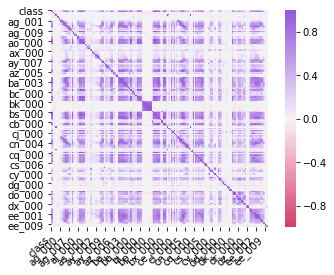

In [31]:
aps_corr = aps_failure_train_df.corr()
ax_aps = sns.heatmap(
    aps_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 1000, n=200),
    square=True
)
ax_aps.set_xticklabels(
    ax_aps.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

##### iv. Pick [170] features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

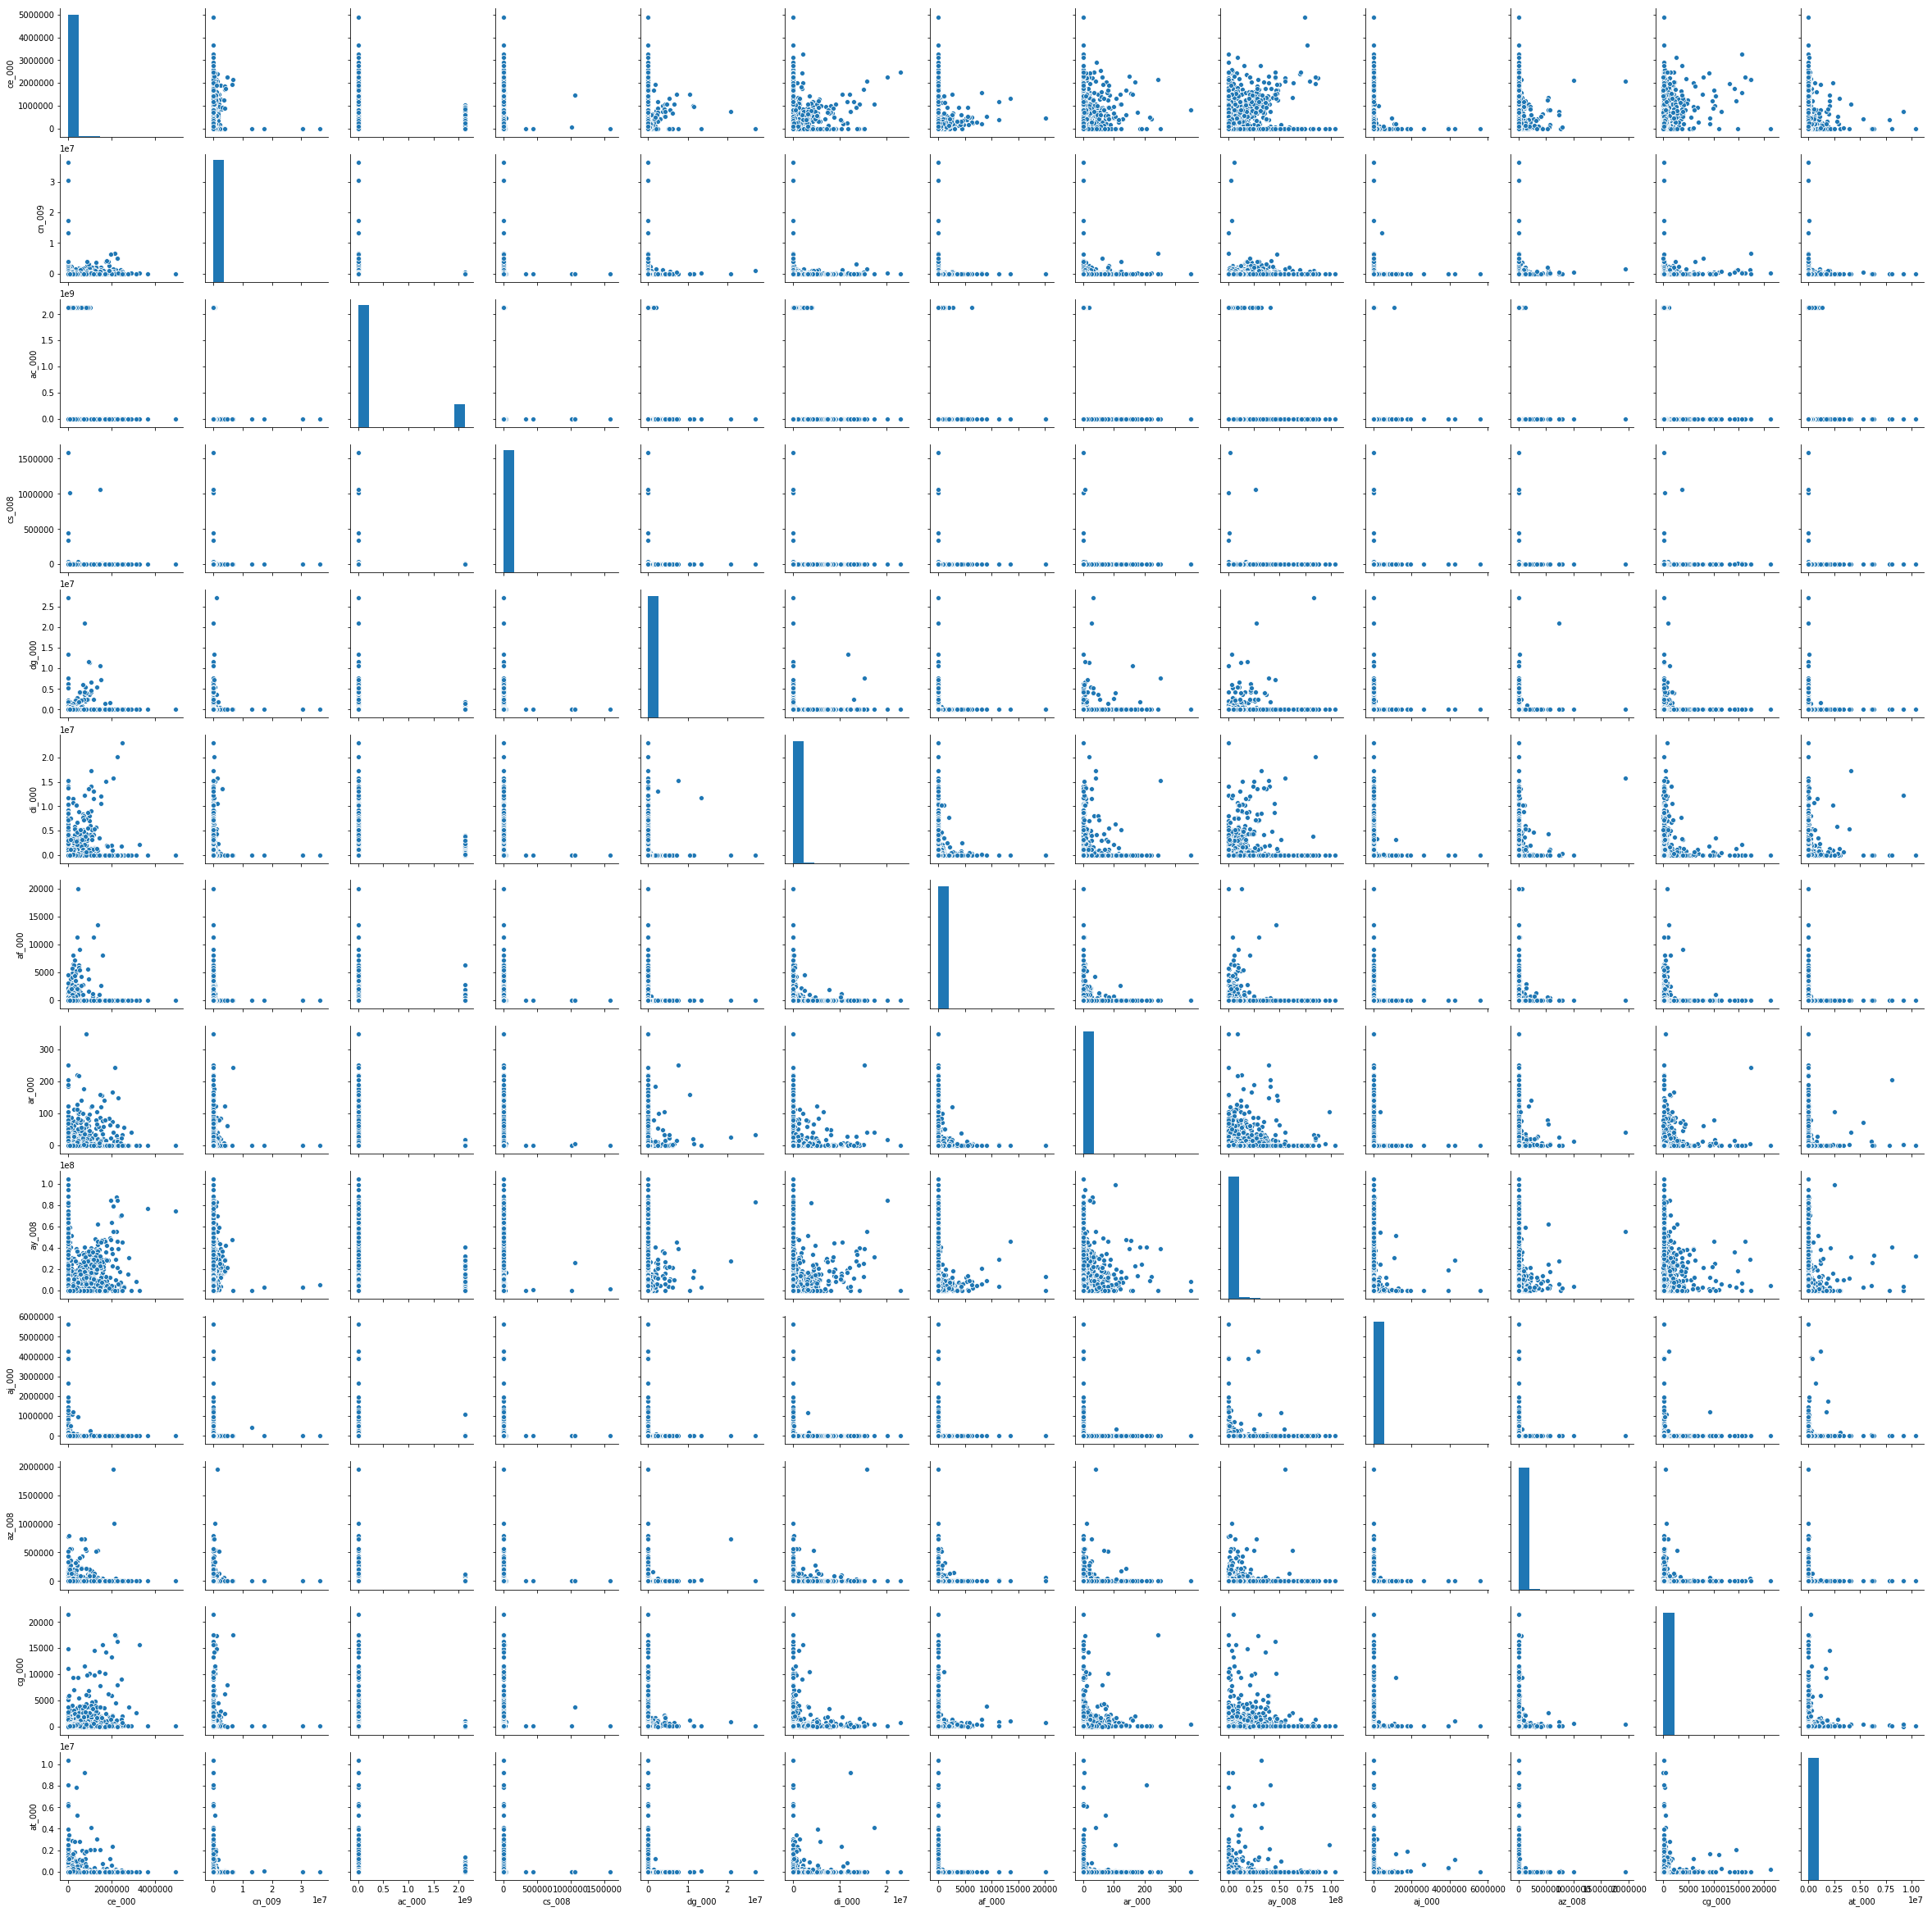

In [32]:
arr_of_CV_aps = df_CV_aps.to_numpy()
top_13_CV_aps = heapq.nlargest(13, range(len(arr_of_CV_aps)), arr_of_CV_aps.take)
top13_CV_df_aps = aps_failure_train_df.iloc[:, top_13_CV_aps]
top13_CV_df_aps.columns = top13_CV_df_aps.columns.map(str)
sns.pairplot(top13_CV_df_aps)
plt.show()

In [33]:
# arr_of_CV_aps = df_CV_aps.to_numpy()
# top_13_CV_aps = heapq.nlargest(13, range(len(arr_of_CV_aps)), arr_of_CV_aps.take)
# # top_13_CV_columns_aps = []
# # for i in top_13_CV_aps:
# #     i = i + 5
# #     top_11_CV_columns.append(i)
# top13_CV_df_aps = aps_failure_train_df.iloc[:, top_13_CV_aps]
# top13_CV_df_aps.columns = top13_CV_df_aps.columns.map(str)
top13_CV_df_aps["Target"] = y_train_aps
# for i in top13_CV_df_aps:
#     if i != 'Target':
#         g = sns.lmplot(x = i, y = 'Target', data = top13_CV_df_aps, sharey = False)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Scatter plots are not similar to line graphs for data points.
We see a little positive correlation between some of the features. 

In [34]:
top13_CV_df_aps

,ce_000,cn_009,ac_000,cs_008,dg_000,di_000,af_000,ar_000,ay_008,aj_000,az_008,cg_000,at_000,Target
0,246244.0,1608.0,2.130706e+09,118.0,0.0,0.0,0.0,0.0,755876.0,0.0,0.0,96.0,0.0,0
1,0.0,56.0,0.000000e+00,22.0,0.0,0.0,0.0,0.0,99560.0,68.0,0.0,46.0,0.0,0
2,63328.0,28.0,2.280000e+02,246.0,0.0,0.0,0.0,0.0,1450312.0,0.0,0.0,124.0,0.0,0
3,302.0,0.0,7.000000e+01,0.0,0.0,0.0,10.0,0.0,5596.0,0.0,0.0,6.0,0.0,0
4,135720.0,86.0,1.368000e+03,204.0,0.0,0.0,0.0,0.0,584074.0,226.0,0.0,152.0,0.0,0
5,74986.0,200.0,2.130706e+09,86.0,0.0,0.0,0.0,0.0,447274.0,0.0,0.0,50.0,0.0,0
6,0.0,0.0,6.000000e+00,0.0,0.0,64.0,0.0,0.0,6118.0,0.0,0.0,46.0,0.0,0
7,173620.0,286.0,2.130706e+09,352.0,0.0,0.0,0.0,0.0,517638.0,0.0,0.0,116.0,0.0,0
8,0.0,1054.0,0.000000e+00,170.0,0.0,0.0,0.0,0.0,5030950.0,80.0,4.0,46.0,0.0,0
9,0.0,0.0,1.820000e+02,0.0,0.0,1433920.0,0.0,2.0,960182.0,0.0,0.0,46.0,0.0,1


Text(0.5, 0, 'Features')

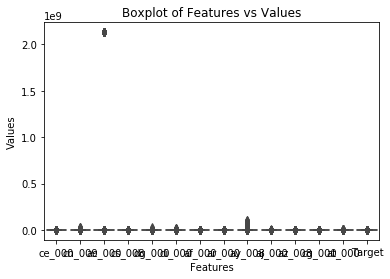

In [35]:
boxplot_top13_CV_aps = sns.boxplot(data = top13_CV_df_aps)
boxplot_top13_CV_aps.set_title('Boxplot of Features vs Values')
boxplot_top13_CV_aps.set_ylabel('Values')
boxplot_top13_CV_aps.set_xlabel('Features')

##### v. Determine the number of positive and negative data. Is this data set imbalanced?

In [36]:
print('Training set number of 1s :',np.count_nonzero(y_train_aps))
print('Training set number of 0s :',np.shape(y_train_aps)[0]-np.count_nonzero(y_train_aps))
print('Test set number of 1s :',np.count_nonzero(y_test_aps))
print('Test set number of 0s :',np.shape(y_test_aps)[0]-np.count_nonzero(y_test_aps))
print('Yes, the data set is imbalanced, 0s have much more numbers than 1s.')

Training set number of 1s : 1000
Training set number of 0s : 59000
Test set number of 1s : 375
Test set number of 0s : 15625
Yes, the data set is imbalanced, 0s have much more numbers than 1s.


##### (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rf = RandomForestClassifier(oob_score=True,class_weight=None)
rf.fit(X_train_aps, y_train_aps)

y_pred_rf = rf.predict(X_train_aps)
mse_rf = mean_squared_error(y_train_aps, y_pred_rf)

print('Out-of-bag error estimate: ',1-rf.oob_score_)
print('Training error: ', mse_rf)

y_pred_rf_test = rf.predict(X_test_aps)
mse_rf_test = mean_squared_error(y_test_aps, y_pred_rf_test)

print('Test error: ', mse_rf_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Out-of-bag error estimate:  0.008700000000000041
Training error:  0.0006
Test error:  0.0094375


training data :
 [[58999     1]
 [   35   965]]
Misclassification rate :  0.0006
AUC :  0.9991859623162733


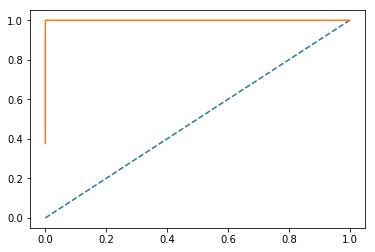

In [38]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train_aps,y_pred_rf)
print("training data :\n",conf_matrix)
print("Misclassification rate : ",(conf_matrix[0][1] + conf_matrix[1][0])/len(y_train_aps))
auc = roc_auc_score(y_pred_rf, y_train_aps)
print('AUC : ',auc)
prob_train = rf.predict_proba(X_train_aps)
fpr, tpr, thresh = roc_curve(y_train_aps, prob_train[:,1])
plt.plot([0, 1], [0, 1],'--')
plt.plot(fpr, tpr)

training data :
 [[15607    18]
 [  133   242]]
Misclassification rate :  0.0094375
AUC :  0.9611597106832177


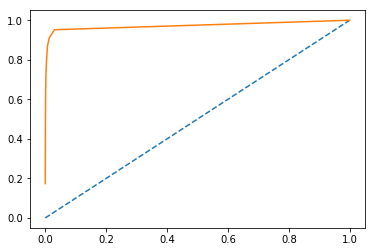

In [39]:
conf_matrix = confusion_matrix(y_test_aps,y_pred_rf_test)
print("training data :\n",conf_matrix)
print("Misclassification rate : ",(conf_matrix[0][1] + conf_matrix[1][0])/len(y_test_aps))
auc = roc_auc_score(y_pred_rf_test, y_test_aps)
print('AUC : ',auc)
prob = rf.predict_proba(X_test_aps)
fpr, tpr, thresh = roc_curve(y_test_aps, prob[:,1])
plt.plot([0, 1], [0, 1],'--')
plt.plot(fpr, tpr)

In [40]:
len(prob[:,1])

16000

##### (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

Using TensorFlow backend.


Out-of-bag error estimate for compensate:  0.008700000000000041
Training error for compensate:  0.002
training data :
 [[999   1]
 [  3 997]]
Misclassification rate :  0.002
AUC :  0.9980019920079682


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


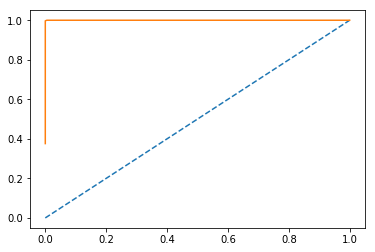

In [41]:
from imblearn.under_sampling import RandomUnderSampler

Compensate = RandomUnderSampler(return_indices=True)
X_com, y_com, idx = Compensate.fit_sample(X_train_aps, y_train_aps)

X_com = pd.DataFrame(X_com)
y_com = pd.DataFrame(y_com)

rf_com = RandomForestClassifier(oob_score=True)
rf_com.fit(X_com, y_com)

y_pred_com = rf_com.predict(X_com)
mse_com = mean_squared_error(y_com, y_pred_com)

print('Out-of-bag error estimate for compensate: ',1-rf.oob_score_)
print('Training error for compensate: ', mse_com)

conf_matrix_com_train = confusion_matrix(y_com, y_pred_com)
print("training data :\n",conf_matrix_com_train)
print("Misclassification rate : ",(conf_matrix_com_train[0][1] + conf_matrix_com_train[1][0])/len(y_com))
auc = roc_auc_score(y_pred_com, y_com)


print('AUC : ',auc)
prob_train_com = rf.predict_proba(X_com)
fpr, tpr, thresh = roc_curve(y_com, prob_train_com[:,1])

plt.plot([0, 1], [0, 1],'--')
plt.plot(fpr, tpr, auc)

Out-of-bag error estimate for compensate:  0.008700000000000041
Test error for compensate:  0.004
test data :
 [[373   2]
 [  1 374]]
Misclassification rate :  0.004
AUC :  0.996003527136193


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


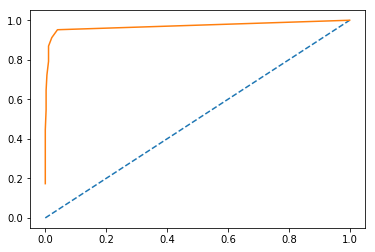

In [42]:
Compensate = RandomUnderSampler(return_indices=True)
X_com2, y_com2, idx2 = Compensate.fit_sample(X_test_aps, y_test_aps)

X_com2 = pd.DataFrame(X_com2)
y_com2 = pd.DataFrame(y_com2)

rf_com2 = RandomForestClassifier(oob_score=True)
rf_com2.fit(X_com2, y_com2)

y_pred_com2 = rf_com2.predict(X_com2)
mse_com2 = mean_squared_error(y_com2, y_pred_com2)

print('Out-of-bag error estimate for compensate: ',1-rf.oob_score_)
print('Test error for compensate: ', mse_com2)

conf_matrix_com_test = confusion_matrix(y_com2, y_pred_com2)
print("test data :\n",conf_matrix_com_test)
print("Misclassification rate : ",(conf_matrix_com_test[0][1] + conf_matrix_com_test[1][0])/len(y_com2))

auc = roc_auc_score(y_pred_com2, y_com2)
print('AUC : ',auc)
prob_2 = rf.predict_proba(X_com2)
fpr, tpr, thresh = roc_curve(y_com2, prob_2[:,1])

plt.plot([0, 1], [0, 1],'--')
plt.plot(fpr, tpr, auc)

The test error reduce compare to (c), thus we can say that compensating for class imbalance do help the model.


##### (e) Model Trees
##### In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has Sigma j BjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. One can use scikit learn to call Weka7 to train Logistic Model Trees for classification. Train Logistic Model Trees for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

### downsample size to 6000

In [43]:
import weka.core.converters as converters
import weka.core.jvm as jvm
from weka.classifiers import Classifier
from weka.flow.control import Flow, Branch, Sequence
from weka.classifiers import FilteredClassifier
from weka.core.converters import Loader
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.filters import Filter
from weka.core.converters import Loader
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.classifiers import Classifier
from weka.plot.classifiers import plot_roc
from sklearn.utils import shuffle
import javabridge
import arff

jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\user\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


In [185]:
train_label = ['neg' if aps_failure_train_df.iloc[:,0][i] == 0 else 'pos' for i in range(len(aps_failure_train_df.iloc[:,0]))]
test_label = ['neg' if aps_failure_train_df.iloc[:,0][i] == 0 else 'pos' for i in range(len(aps_failure_test_df.iloc[:,0]))]

In [186]:
aps_failure_train_df['class'] = train_label
aps_failure_test_df['class'] = test_label

In [187]:
aps_failure_train_df.to_csv("WekaTrain.csv", index = False, header = True)
aps_failure_test_df.to_csv("WekaTest.csv", index = False, header = True)

In [188]:
train = converters.load_any_file("WekaTrain2.csv")
test = converters.load_any_file("WekaTest2.csv")

In [191]:
clf = Classifier(classname="weka.classifiers.trees.LMT")

In [192]:
train.class_is_first()
test.class_is_first()

In [193]:
clf.build_classifier(train)

In [194]:
eval_test = Evaluation(test)
evl_test = eval_test.test_model(clf,test)

In [195]:
print(eval_test.summary())


Correctly Classified Instances        5789               96.4833 %
Incorrectly Classified Instances       211                3.5167 %
Kappa statistic                          0.0098
Mean absolute error                      0.0407
Root mean squared error                  0.1814
Relative absolute error                116.6956 %
Root relative squared error            137.7145 %
Total Number of Instances             6000     



In [196]:
conf_test = eval_test.confusion_matrix
conf_test

array([[5.786e+03, 1.080e+02],
       [1.030e+02, 3.000e+00]])

Misclassification rate for test :  0.035166666666666666
AUC                             :  0.45143046014174953
weightedAreaUnderROC            : 0.4514304601417495


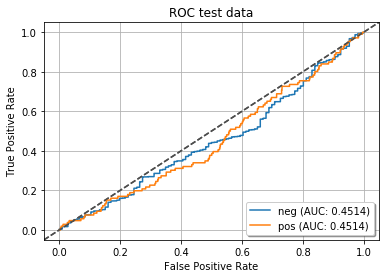

In [197]:
print("Misclassification rate for test : ",(conf_test[0][1] + conf_test[1][0])/len(test))
import weka.plot.classifiers as pl2  

print("AUC                             : ", eval_test.area_under_roc(1))
print("weightedAreaUnderROC            : " + str(eval_test.weighted_area_under_roc))
pl2.plot_roc(eval_test, title="ROC test data", class_index=[0,1], wait=True)

[0. 0. 0. ... 0. 0. 0.]

Correctly Classified Instances        5954               99.2333 %
Incorrectly Classified Instances        46                0.7667 %
Kappa statistic                          0.7407
Mean absolute error                      0.0138
Root mean squared error                  0.0806
Relative absolute error                 39.4626 %
Root relative squared error             61.1959 %
Total Number of Instances             6000     

[[5887.    7.]
 [  39.   67.]]
Misclassification rate for train :  0.007666666666666666
AUC                             :  0.9806598971771741
weightedAreaUnderROC            : 0.980659897177174


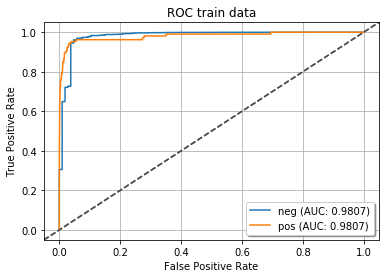

In [198]:
eval_train = Evaluation(train)
evl_train = eval_train.test_model(clf,train)
print(evl_train)
print(eval_train.summary())
conf_train = eval_train.confusion_matrix
print(conf_train)
print("Misclassification rate for train : ",(conf_train[0][1] + conf_train[1][0])/len(train))
import weka.plot.classifiers as pl2  

print("AUC                             : ", eval_train.area_under_roc(1))
print("weightedAreaUnderROC            : " + str(eval_train.weighted_area_under_roc))
pl2.plot_roc(eval_train, title="ROC train data", class_index=[0,1], wait=True)

##### (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.8 Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE.

In [133]:
import weka.plot.classifiers as plcls  # NB: matplotlib is required

In [134]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [199]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train_aps, y_train_aps)
temp_df = pd.DataFrame(X_res)
temp_df['class'] = y_res
temp_df = shuffle(temp_df)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [200]:
X_res_t, y_res_t = sm.fit_sample(X_test_aps, y_test_aps)
temp_df_t = pd.DataFrame(X_res_t)
temp_df_t['class'] = y_res_t
temp_df_t = shuffle(temp_df_t)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [201]:
train_label = ['neg' if temp_df.iloc[:,-1][i] == 0 else 'pos' for i in range(len(temp_df.iloc[:,-1]))]
test_label = ['neg' if temp_df_t.iloc[:,-1][i] == 0 else 'pos' for i in range(len(temp_df_t.iloc[:,-1]))]

In [202]:
temp_df['class'] = train_label
temp_df_t['class'] = test_label

In [203]:
# temp_df.to_csv("WekaTrain_smote.csv", index = False, header = True)
# temp_df_t.to_csv("WekaTest_smote.csv", index = False, header = True)

In [204]:
# train = converters.load_any_file("WekaTrain_smote2.csv")
# test = converters.load_any_file("WekaTest_smote2.csv")

In [231]:
temp_df.iloc[:6000,:].to_csv("WekaTrain_smote3.csv", index = False, header = True)
temp_df_t.iloc[:6000,:].to_csv("WekaTest_smote3.csv", index = False, header = True)

In [232]:
train2 = converters.load_any_file("WekaTrain_smote3.csv")
test2 = converters.load_any_file("WekaTest_smote3.csv")

In [233]:
clf = Classifier(classname="weka.classifiers.trees.LMT")

In [234]:
train2.class_is_last()
test2.class_is_last()
clf.build_classifier(train2)

[0. 0. 0. ... 0. 0. 0.]

Correctly Classified Instances        5839               97.3167 %
Incorrectly Classified Instances       161                2.6833 %
Kappa statistic                          0.0075
Mean absolute error                      0.0432
Root mean squared error                  0.1603
Relative absolute error                 90.0338 %
Root relative squared error            103.6934 %
Total Number of Instances             6000     

[[5.838e+03 1.500e+01]
 [1.460e+02 1.000e+00]]
Misclassification rate for test :  0.026833333333333334
AUC                             :  0.4877305783068396
weightedAreaUnderROC            : 0.4877305783068396


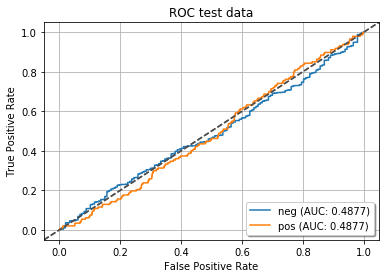

In [235]:
train2.class_is_last()
test2.class_is_last()
clf.build_classifier(train2)
eval_test = Evaluation(test2)
evl_test = eval_test.test_model(clf,test2)
print(evl_test)
print(eval_test.summary())
conf_test = eval_test.confusion_matrix
print(conf_test)
print("Misclassification rate for test : ",(conf_test[0][1] + conf_test[1][0])/sum(sum(conf_test)))
print("AUC                             : ", eval_test.area_under_roc(1))
print("weightedAreaUnderROC            : " + str(eval_test.weighted_area_under_roc))
plcls.plot_roc(eval_test, title="ROC test data", class_index=[0,1])

[0. 0. 0. ... 0. 0. 0.]

Correctly Classified Instances        5896               98.2667 %
Incorrectly Classified Instances       104                1.7333 %
Kappa statistic                          0.0364
Mean absolute error                      0.0342
Root mean squared error                  0.1303
Relative absolute error                 97.9704 %
Root relative squared error             98.9209 %
Total Number of Instances             6000     

[[5.894e+03 0.000e+00]
 [1.040e+02 2.000e+00]]
Misclassification rate for train :  0.017333333333333333
AUC                             :  0.6255714157665935
weightedAreaUnderROC            : 0.6255714157665935


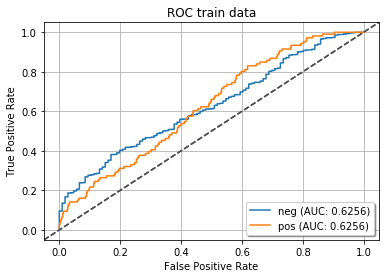

In [238]:
eval_train = Evaluation(train2)
evl_train = eval_train.test_model(clf,train2)
print(evl_train)
print(eval_train.summary())
conf_train = eval_train.confusion_matrix
print(conf_train)
print("Misclassification rate for train : ",(conf_train[0][1] + conf_train[1][0])/sum(sum(conf_train)))
print("AUC                             : ", eval_train.area_under_roc(1))
print("weightedAreaUnderROC            : " + str(eval_train.weighted_area_under_roc))
plcls.plot_roc(eval_train, title="ROC train data", class_index=[0,1])

### 6.8.3
##### Suppose we estimate the regression coefficients in a linear regression model by minimizing      
##### (sigma  yi − β0 − sigma βjxij )subject to sigma |βj| ≤ s                 
##### for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

##### (a) As we increase s from 0, the training RSS will:
##### i. Increase initially, and then eventually start decreasing in an inverted U shape.
##### ii. Decrease initially, and then eventually start increasing in a U shape.
##### iii. Steadily increase.
##### iv. Steadily decrease.
##### v. Remain constant.
##### (b) Repeat (a) for test RSS.
##### (c) Repeat (a) for variance.
##### (d) Repeat (a) for (squared) bias.
##### (e) Repeat (a) for the irreducible error.

(a): Steadily Decrease: When s is zero we will have a high RSS value.
(b): The test RSS will initially decrease first then increase in U shape due to a bias variance trade-off.
(c): The variance will steadily increase. The model will become more flexible.
(d): Steadily decrease: Tincrease in s will lead to decrease in bias.
(e): Remain Constant. The irreducible error is not modeled.

### 6.8.5
##### It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting. Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore, suppose that y1+y2 = 0 and x11+x21 = 0 and x12+x22 = 0, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: ˆ β0 = 0.
##### (a) Write out the ridge regression optimization problem in this setting.


##### (b) Argue that in this setting, the ridge coefficient estimates satisfyˆ β1 = ˆ β2.

##### (c) Write out the lasso optimization problem in this setting.

##### (d) Argue that in this setting, the lasso coefficients ˆ β1 and ˆ β2 are not unique—in other words, there are many possible solutions

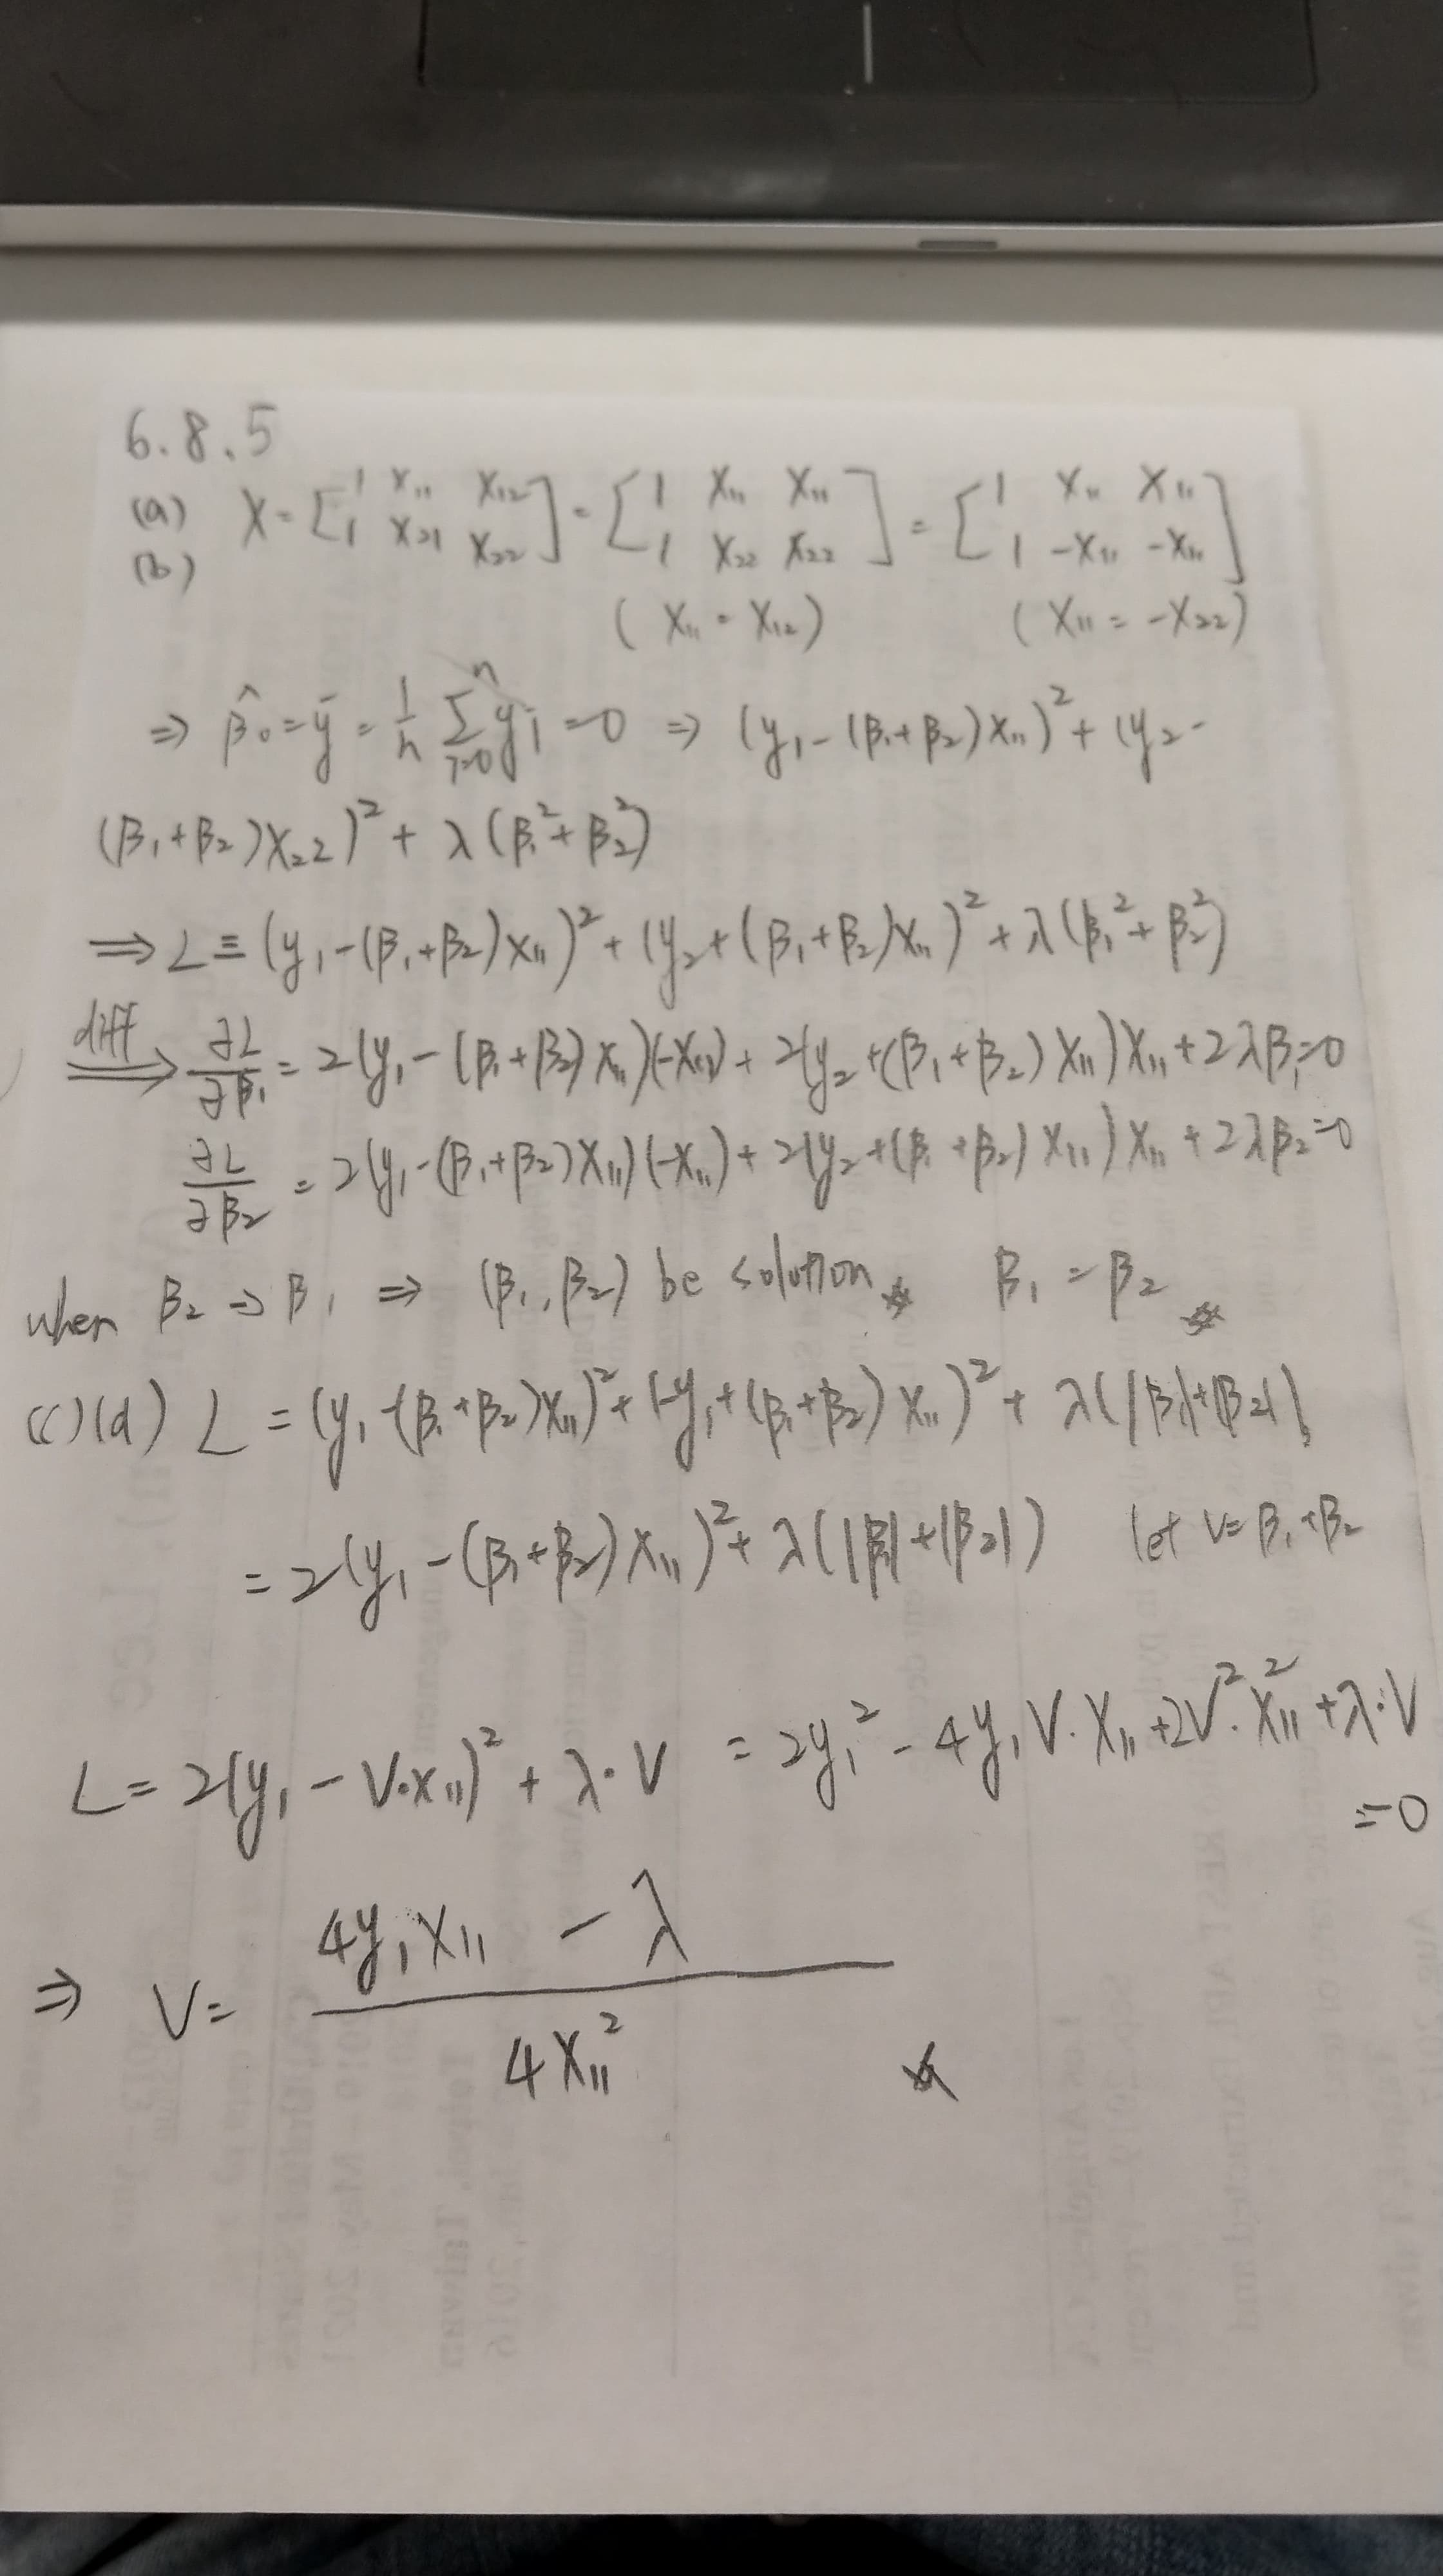

In [57]:
from IPython.display import Image
Image(filename='6.8.5.jpg') 

### 8.4.5
##### Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75. There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

In [58]:
sum([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75])/10

0.45

This gives probability 0.45 for red and 0.55 for not red. Thus we would determine our sample as not red.

### 9.7.3
###### Here we explore the maximal margin classifier on a toy data set.
###### (a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label. Sketch the observations.
###### (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).
###### (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 +β1X1 +β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.
###### (d) On your sketch, indicate the margin for the maximal margin hyperplane.
###### (e) Indicate the support vectors for the maximal margin classifier.
###### (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.
###### (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.
###### (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

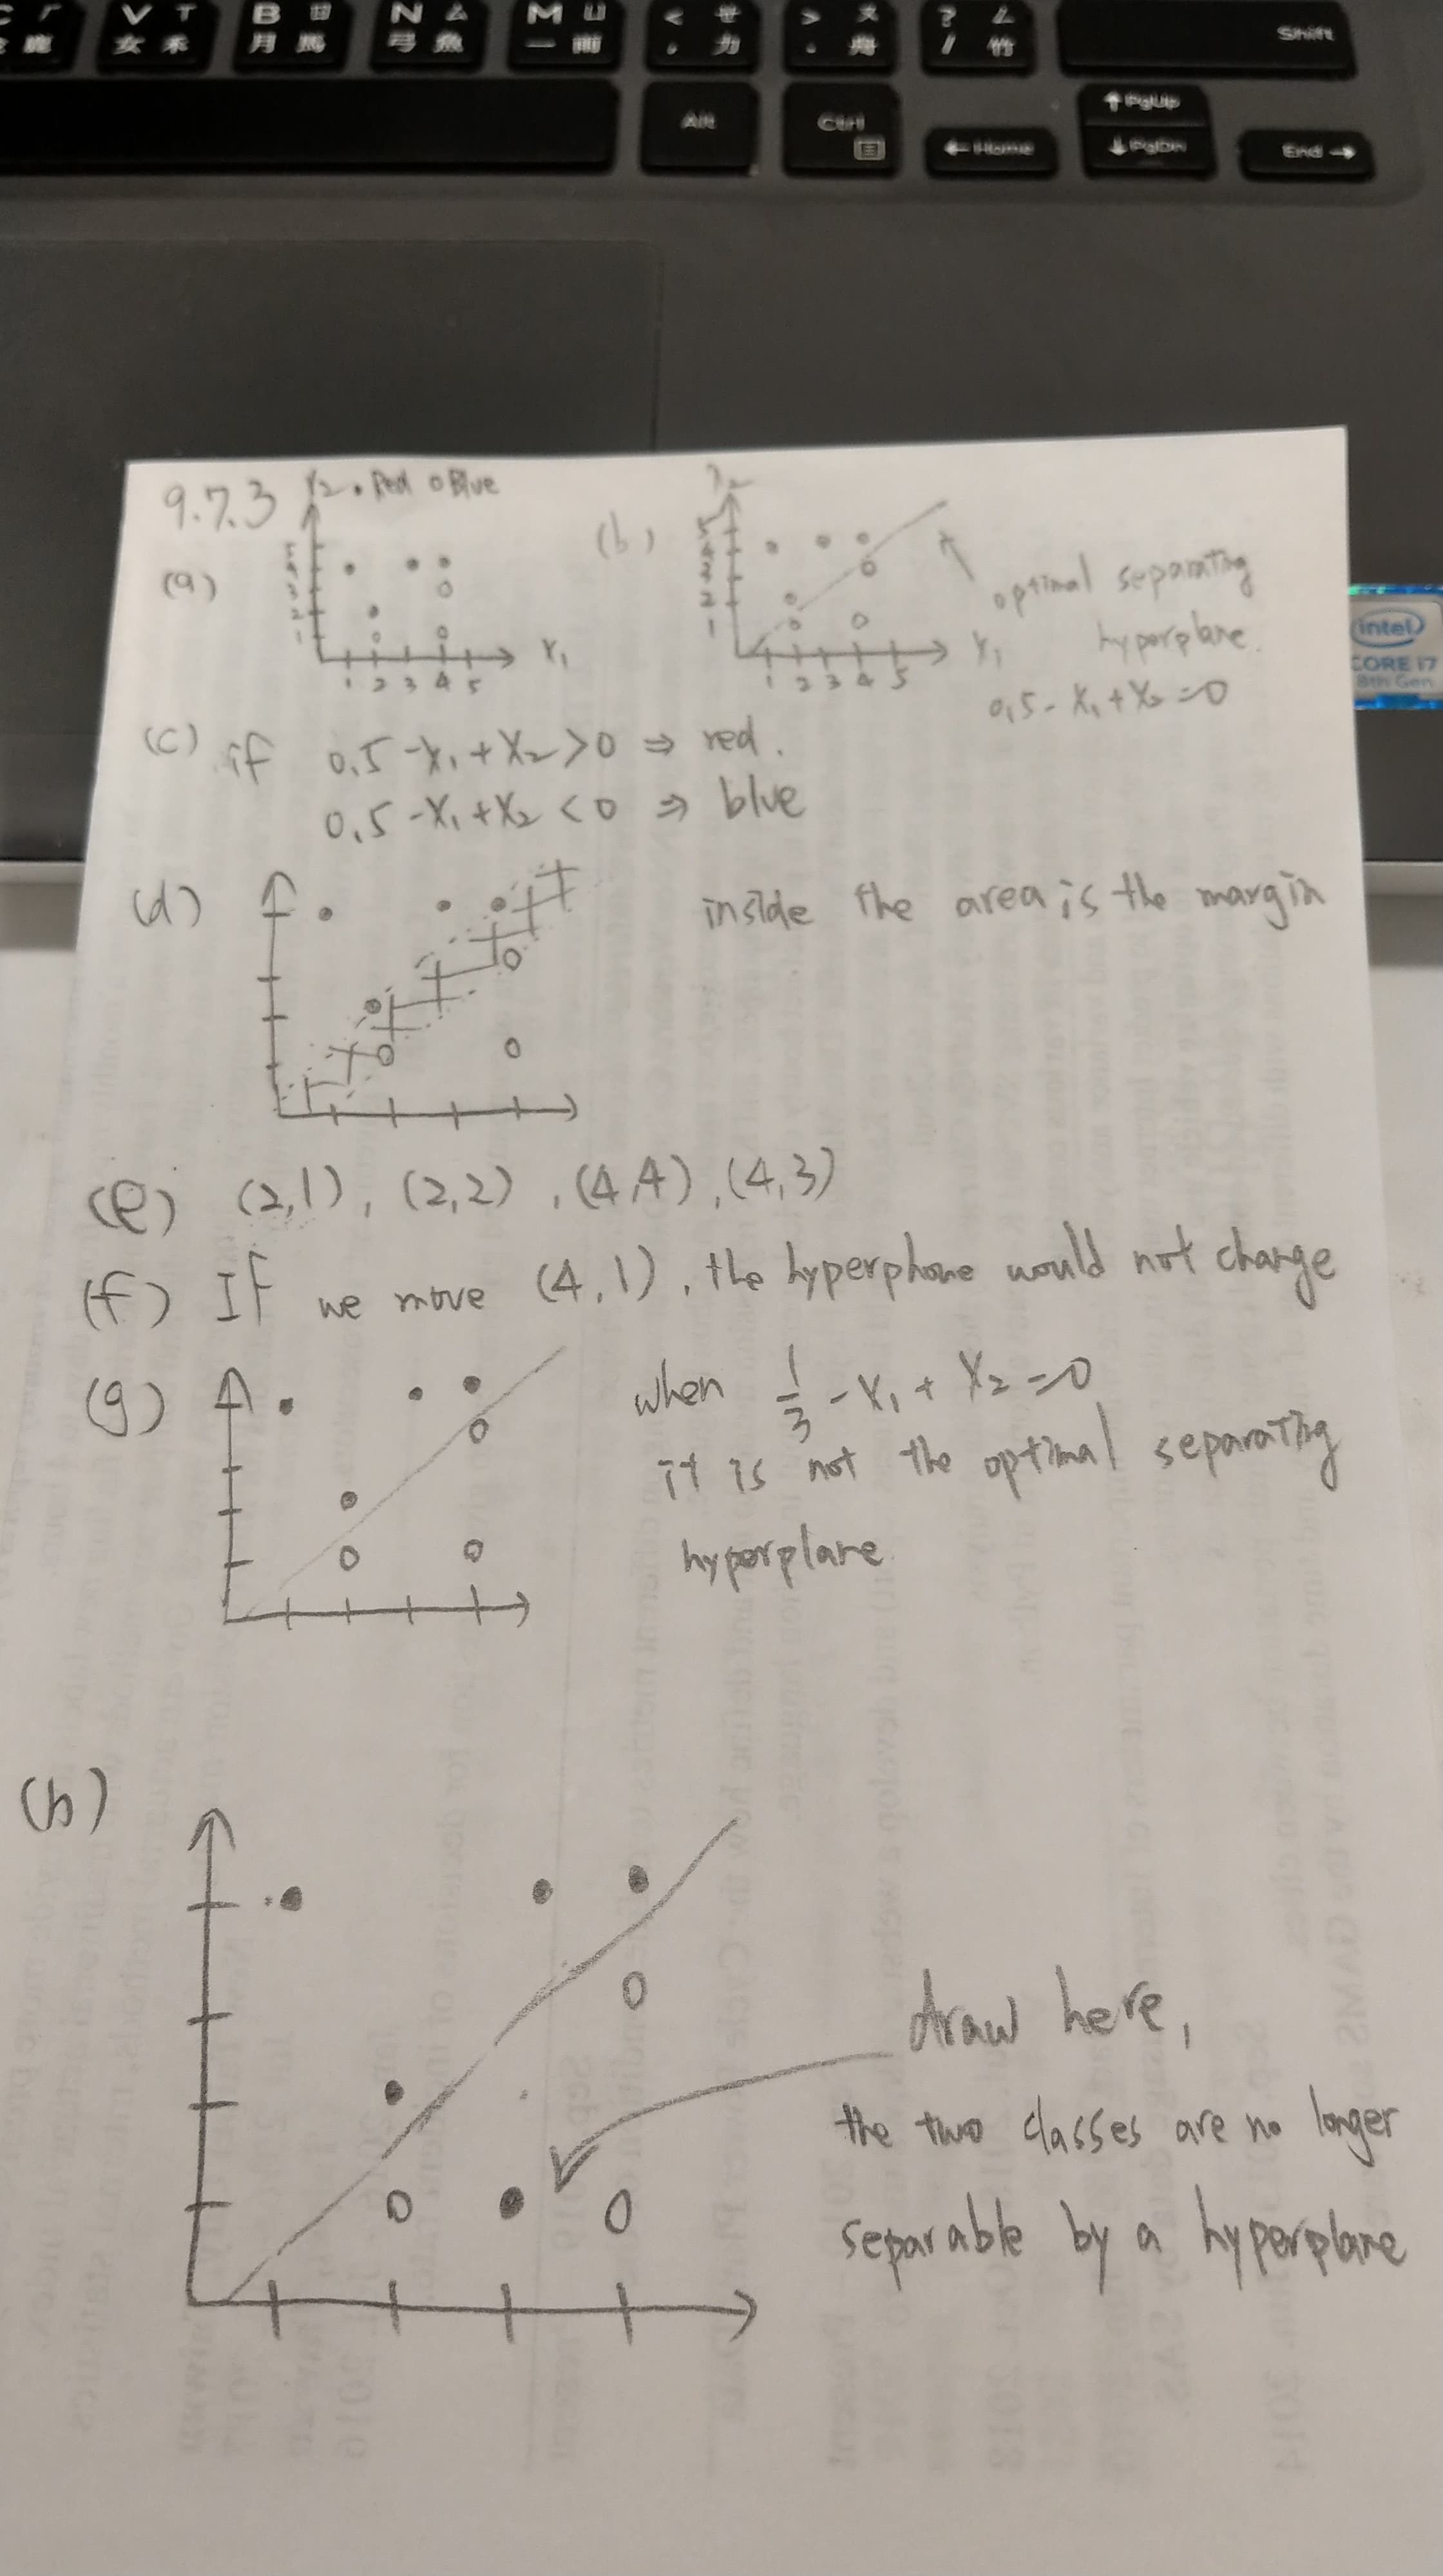

In [59]:
Image(filename='9.7.3.jpg') 